# BEE 4750 Homework 1: Introduction to Using Julia

**Name**: Priya Shah

**ID**: 5244508

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/Downloads/BEE4750/hw1-ps742`
   Installed NetworkLayout ─────────────── v0.4.6
   Installed GR_jll ────────────────────── v0.73.5+0
   Installed ArnoldiMethod ─────────────── v0.4.0
   Installed OffsetArrays ──────────────── v1.14.0
   Installed EarCut_jll ────────────────── v2.2.4+0
   Installed ConcurrentUtilities ───────── v2.4.1
   Installed StaticArrays ──────────────── v1.9.4
   Installed IJulia ────────────────────── v1.24.2
   Installed StaticArraysCore ──────────── v1.4.2
   Installed TranscodingStreams ────────── v0.10.9
   Installed GLFW_jll ──────────────────── v3.3.9+0
   Installed Ratios ────────────────────── v0.4.5
   Installed Graphs ────────────────────── v1.11.0
   Installed GraphRecipes ──────────────── v0.5.13
   Installed CodecZlib ─────────────────── v0.7.4
   Installed GeometryTypes ─────────────── v0.8.5
   Installed Xorg_libxcb_jll ───────────── v1.15.0+0
   Installed Conda ─────────────────────── v1.10.0
   Installed Plots ─────────

Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [2]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings

In [3]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

Original code:

In [1]:
function minimum(array)
    min_value = 0
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 0

This function will not work because the array values are being compared to zero right from the beggining. In order for this to work, the initial min_value should be a very large number such as inf. See my corrected code below.

Edited Code:


In [5]:
function minimum(array)
    min_value = Inf
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

Original code:

In [6]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show average_grade;

UndefVarError: UndefVarError: `average_grade` not defined

- In the code above, the 'class_average' function was taking the mean of 'student_grades', which is a specific array that should not be specificed here in the function definiton. In this case, the function should be taking the mean of the 'grades' array. 
- The 'mean' function is not defined here, so I created a function for it. 
- Lastly, the '@show average_grade' line of code is creating an error as 'average_grade' was only definied within the code. To display the answer, I changed this final line to '@show class_average(student_grades)' in order to evaulate the function in terms of 'student_grades'.

All of these changes can be seen in my corrected code below. 

Edited Code:

In [15]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]

function mean(x)
    sum0=0;
    for i=1:length(x)
        sum=sum0+x[i];
        sum0=sum;
    end
    mean_ans = sum0/length(x);
    return mean_ans
end

function class_average(grades)
  average_grade = mean(grades)
  return average_grade
end

@show class_average(student_grades);

class_average(student_grades) = 94.4


#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

Original code:

In [44]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end

n_trials = 1_000
outcomes = zero(n_trials)
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

MethodError: MethodError: no method matching setindex!(::Int64, ::Bool, ::Int64)

- In the code above, the creation of the 'outcomes' array is not building a vector of zeros as intended. In order to create an empty array, the function has to read 'zeros(n_trials)' and not 'zero(n_trials)'
- The outcome should read true if the sum of the roll is greater than or equal to 11, where as in the code above, it only tests that the sum of the roll is greater than 11. 
- There was also an error with finding the proabability of a win with making the values within the array either 'true' or 'false', so I added an if statement within the for loop to change the values within the value vector to either 0 or 1

All of these changes can be seen in my corrected code below. 

Edited code:

In [42]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end

n_trials = 1_000
outcomes = zeros(n_trials)
for i = 1:n_trials
    if sum(passadieci()) >= 11
        outcomes[i] = 1;
    else
        outcomes[i] = 0;
    end
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

win_prob = 0.498


### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [126]:
# This function returns an array with duplicates removed while preserving the order of the first appearance of each element.
function mystery_function(values)
    y = []  # Initializes an empty list to store unique values
    for v in values   
        if !(v in y)  # Checks if the current value is not already in the list and appends it if not
            append!(y, v)
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

# The following built-in Julia function does the same thing:
@show unique(list_of_values);   
    # Found this function from google on stack overflow: https://stackoverflow.com/questions/54652787/julia-function-to-return-non-unique-elements-of-an-array 

mystery_function(list_of_values) = Any[1, 2, 3, 4]
unique(list_of_values) = [1, 2, 3, 4]


4-element Vector{Int64}:
 1
 2
 3
 4

### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.

**In this problem**:

-   Explain the purpose of `mystery_function`.
-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.
-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above.

In [149]:
function compute_mean(v)
    sum0=0;
    for i=1:length(v)
        sum=sum0+v[i];
        sum0=sum;
    end
    avg=sum0/length(v);
end

random_vect=rand(10) # random vector of length 10
mean_random_vect=compute_mean(random_vect) 
zero_mean_vect = random_vect .- mean_random_vect 
mean_zero_mean_vect = compute_mean(zero_mean_vect) # checking that the mean of the vector produced by subtracting the mean of the random vector by the random vector equals zero 

2.2204460492503132e-17

### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

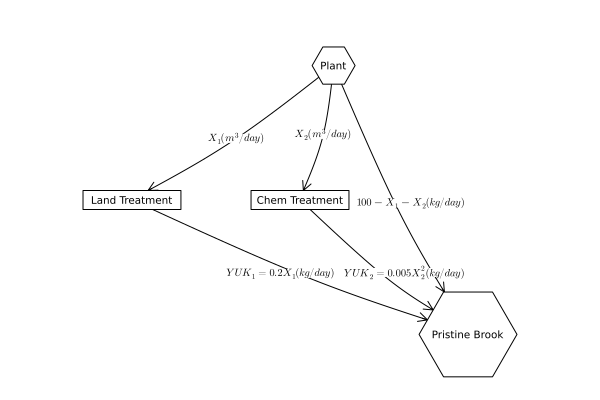

In [136]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => L"X_1 (m^3/day)", (1,3) => L"X_2 (m^3/day)", (1, 4) => L"\qquad\qquad100-X_1-X_2 (kg/day)",(2, 4) => L"YUK_1=0.2X_1 (kg/day)\qquad\qquad",(3, 4) => L"\qquad\qquad\qquad YUK_2=0.005X_2^2 (kg/day)")
# I googled Latex syntax to add extra spaces and learned of 'qquad': https://www.overleaf.com/learn/latex/Line_breaks_and_blank_spaces 
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.

-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?

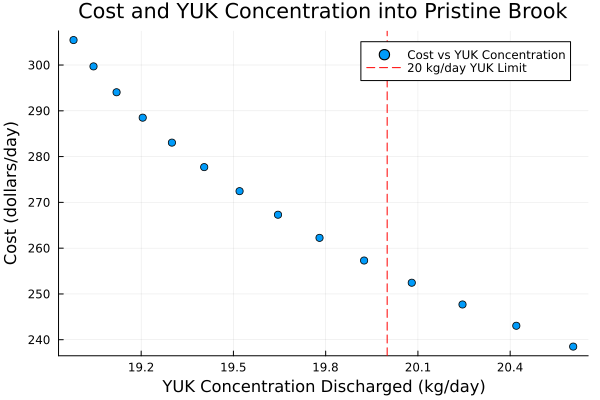

In [143]:
# Determines treatment cost and the amount of YUK that will be discharged into Pristine Brook based on the wastewater allocations
function pristine_brook(X1, X2)
    if X1+X2>100
        throw("This combination gives an amount of wastewater that is above the 100m^3/day limit. Please try again")
    end
    X0=100-X1-X2
    YUK_discharged_0 = X0 * 1
    e1 = 0.8 # percentage of YUK removed 
    YUK_discharged_1 = (1-e1) * X1 * 1 #kg/day
    e2 = 1 - (0.005 * X2) # percentage of YUK removed
    YUK_discharged_2 = (1-e2) * X2 * 1 #kg/day
    total_YUK_discharged = YUK_discharged_0 + YUK_discharged_1 + YUK_discharged_2
    cost_0 = 0
    cost_1 = (X1^2)/20
    cost_2 = 1.5 * X2
    total_cost = cost_0 + cost_1 + cost_2
    return(total_cost, total_YUK_discharged)
end

trial_X1 = collect(60:73)
trial_X2 = collect(39:-1:26)

trial_output = pristine_brook.(trial_X1, trial_X2);
cost = [out[1] for out in trial_output]
YUK_concentrations =[out[2] for out in trial_output]

#plotting the cost vs YUK concentration
scatter(YUK_concentrations, costs, label = "Cost vs YUK Concentration", xlabel = "YUK Concentration Discharged (kg/day)", ylabel = "Cost (dollars/day)", title = "Cost and YUK Concentration into Pristine Brook", legend=:topright)
vline!([20], linestyle=:dash, color=:red, label = "20 kg/day YUK Limit")
plot!()
# To make this graph, I referenced Google to find plotting syntax: https://docs.juliaplots.org/latest/tutorial/


Out of the multiple trial combinations I performed using this function, I found that the best treatment combination would be to send 64 $\text{m}^3\text{/day}$ to method 1 and 35 $\text{m}^3\text{/day}$ to method 2, as it would cost 257.3 dollars/day and discharge 19.925 kg/day of YUK. 

Looking at the graph generated by my experiments, it seems that as more YUK is removed, the more expensive the treatment becomes. 

Through trial and error, I most likely did not reach the most optimal solution for determining the best combination of treatment methods. In order to do so, I would need to loop through all possible combinations, find the resulting cost and concentration YUK discharged, and find the cheapest combination where YUK concentrations are less than 20 kg/day. 

I was interested in performing this optimization myself, so I wrote the following code below.  It loops through all possible integer combinations and adds any of the ones where the YUK concentrations are less than or equal to 20 kg/day into a matrix titled 'options'. I could further improve this code by finding combinations that are not integers. 

In [144]:
options = Matrix{Any}(undef, 0, 5) # empty matrix to store all possible combinations where YUK concentrations are less than 20 kg/day 
for X0=1:100 # Wastewater directly discharged to Pristine Brook (m^3/day)
    for X1=1:100 # Wastewater discharged to Method 1: Land Disposal (m^3/day)
        for X2=1:100 # Wastewater discharged to Method 2: Chemical Treatment (m^3/day)
            if X0+X1+X2==100
                YUK_discharged_0 = X0 * YUK_conc
                e1 = 0.8 # percentage of YUK removed in Method 1
                YUK_discharged_1 = (1-e1) * X1 * YUK_conc #kg/day
                e2 = 1 - (0.005 * X2) # percentage of YUK removed in Method 2
                YUK_discharged_2 = (1-e2) * X2 * YUK_conc #kg/day
                total_YUK_discharged = YUK_discharged_0 + YUK_discharged_1 + YUK_discharged_2
                if total_YUK_discharged <= 20 
                    cost_0 = 0
                    cost_1 = (X1^2)/20
                    cost_2 = 1.5 * X2
                    total_cost = cost_0 + cost_1 + cost_2
                    options=vcat(options,[total_cost total_YUK_discharged X0 X1 X2])
                end
            end
        end
    end
end

#row index of the minimum cost
min_cost_index = argmin(options[:, 1])

#results
println("Cheapest option cost (dollars/day): ", options[min_cost_index, 1])
println("YUK discharged (kg/day): ", options[min_cost_index, 2])
println("X0: ", options[min_cost_index, 3])
println("X1: ", options[min_cost_index, 4])
println("X2: ", options[min_cost_index, 5])
display(options)

48×5 Matrix{Any}:
 257.3   19.925  1.0  64.0  35.0
 262.25  19.78   1.0  65.0  34.0
 267.3   19.645  1.0  66.0  33.0
 272.45  19.52   1.0  67.0  32.0
 277.7   19.405  1.0  68.0  31.0
 283.05  19.3    1.0  69.0  30.0
 288.5   19.205  1.0  70.0  29.0
 294.05  19.12   1.0  71.0  28.0
 299.7   19.045  1.0  72.0  27.0
 305.45  18.98   1.0  73.0  26.0
   ⋮                        
 334.2   19.6    2.0  78.0  20.0
 340.55  19.605  2.0  79.0  19.0
 347.0   19.62   2.0  80.0  18.0
 353.55  19.645  2.0  81.0  17.0
 360.2   19.68   2.0  82.0  16.0
 366.95  19.725  2.0  83.0  15.0
 373.8   19.78   2.0  84.0  14.0
 380.75  19.845  2.0  85.0  13.0
 387.8   19.92   2.0  86.0  12.0

Cheapest option cost (dollars/day): 257.3
YUK discharged (kg/day): 19.924999999999997
X0: 1.0
X1: 64.0
X2: 35.0


### Problem 5 (10 points)

**This problem is only required for students in BEE 5750**.

#### Problem 5.1

Using a
[comprehension](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#comprehensions),
count the number of odd numbers between 0 and 149.

> **Hint**
>
> `iseven()` returns `true` for even numbers and `false` for odd
> numbers.

#### Problem 5.2

Write a function `polynomial(x, a)` which calculates the polynomial
$$p(x) = \sum_{i=1}^n a_i x^i$$

based on a point `x` and a coefficient vector `a` of length `n` using a
loop. Test your function by computing $$p(x) = 2x^3 - x^2 + 1$$ at
$x=2$.

## References

List any external references consulted, including classmates.

Classmates referenced: Camila Monter, Bailey Belinger

External References:
- Julia plotting syntax: https://docs.juliaplots.org/latest/tutorial/
- Latex spacing formatting: https://www.overleaf.com/learn/latex/Line_breaks_and_blank_spaces 
- Finding the "unique" function: https://stackoverflow.com/questions/54652787/julia-function-to-return-non-unique-elements-of-an-array 